<a href="https://colab.research.google.com/github/shubhi0078/AirBnB-bookings-DF-Analysis/blob/main/AirBnB_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/python datasets folder/Airbnb NYC 2019.csv"
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
# Finding Blank Values in all the columns of AirBnB dataset 
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df.fillna(df['reviews_per_month'].mean(), inplace = True)

                                                name  reviews_per_month
0  Enjoy great views of the City in our Deluxe Room!          58.500000
1           Great Room in the heart of Times Square!          27.950000
2                                Home away from home          27.946107
3                       New york Multi-unit building          25.525771
4                 Lou's Palace-So much for so little          20.940000


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


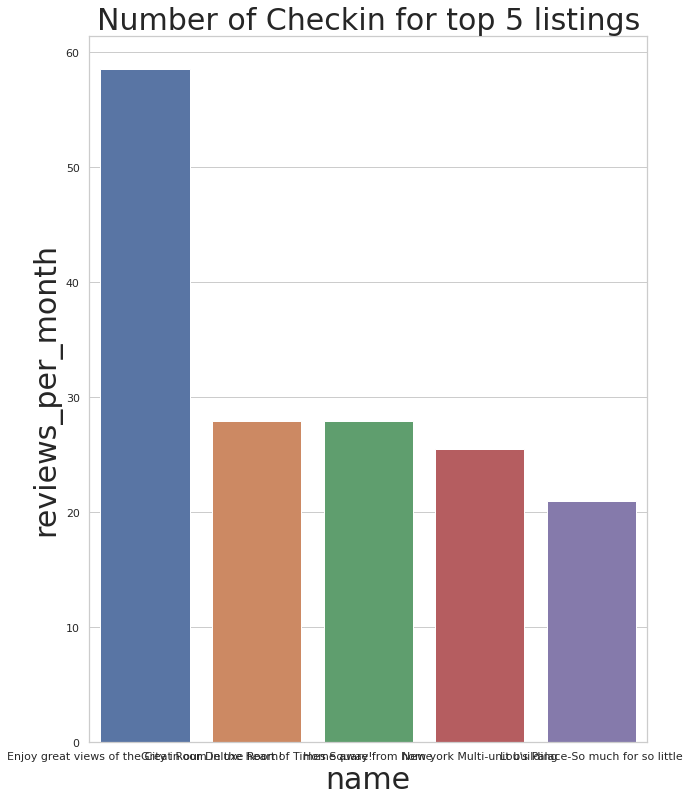

In [ ]:
#1
top_names = df.groupby('name')['reviews_per_month'].sum().sort_values(ascending = False).head(5)

#Reset the index of the top_5_name variable so that we can turn it to a dataframe 
top_names = top_names.reset_index()
print(top_names)


plt.figure(figsize = (10,13))
sns.barplot('name','reviews_per_month',data = top_names)
plt.xlabel('name',fontsize = 30)
plt.ylabel('reviews_per_month',fontsize = 30)
plt.title('Number of Checkin for top 5 listings', fontsize = 30)
plt.show()



neighbourhood_group
Bronx            165.758937
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Staten Island    199.678284
Name: availability_365, dtype: float64


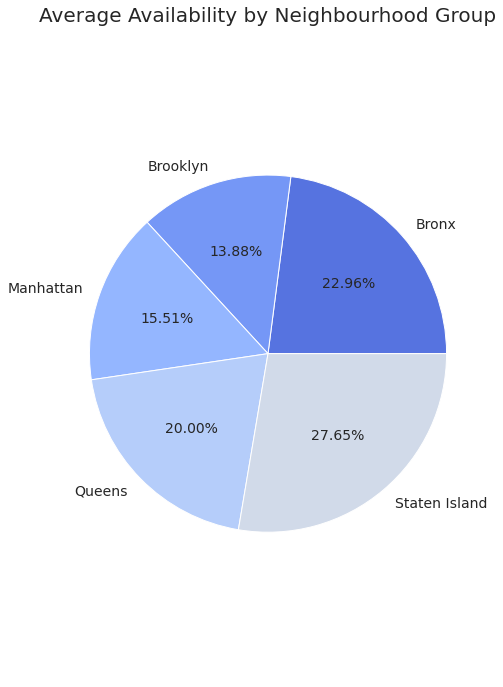

In [ ]:
#2  Average Availabiity to all neighbourhood groups 

avg_neighbourhood_group = df.groupby(['neighbourhood_group'])['availability_365'].mean()
print(avg_neighbourhood_group )

colours = sns.color_palette("coolwarm", 10)
plt.figure(figsize = (8,12))
plt.axis('equal')
plt.pie(avg_neighbourhood_group, labels=avg_neighbourhood_group.index, autopct='%1.2f%%', colors = colours,textprops={'fontsize': 14})
plt.title('Average Availability by Neighbourhood Group', fontsize = 20)
plt.show()


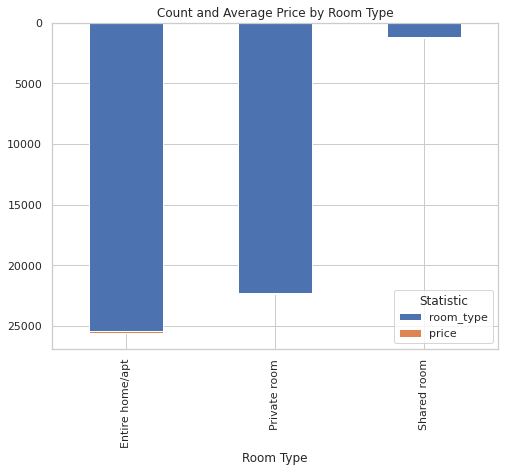

In [ ]:
#3
room_type = df.groupby('room_type').agg({'room_type':'count','price':'mean'})
ax = room_type.plot(kind='bar', stacked=True, figsize=(8,6))

# Set the x-axis label and title
ax.set_xlabel('Room Type')
ax.set_title('Count and Average Price by Room Type')

# Invert the y-axis
ax.invert_yaxis()

# Add a legend
ax.legend(title='Statistic', loc='lower right')

plt.show()
plt.show()

In [ ]:
#4
grouped = df.groupby(['neighbourhood_group','room_type']).agg({'reviews_per_month':'mean','price':'mean'})
sns.set(style="whitegrid")

sns.barplot(x="neighbourhood_group", y="reviews_per_month", hue="room_type", data=grouped, palette="Set2")

# add labels and title
plt.xlabel("Neighbourhood Group")
plt.ylabel("Average Reviews per Month")
plt.title("Grouped Bar Chart")

# show the plot
plt.show()


ValueError: ignored

In [ ]:
#5
df.groupby(['name']).agg({'reviews_per_month':'sum','availability_365':'mean'}).sort_values(by = 'reviews_per_month',ascending = False).head(5)

,reviews_per_month,availability_365
name,,
Enjoy great views of the City in our Deluxe Room!,58.50,299.000000
Great Room in the heart of Times Square!,27.95,299.000000
Home away from home,21.08,123.352941
Lou's Palace-So much for so little,20.94,134.000000
JFK Comfort.5 Mins from JFK Private Bedroom & Bath,19.75,26.000000


In [ ]:
#visuatlize pie chart will be done later 

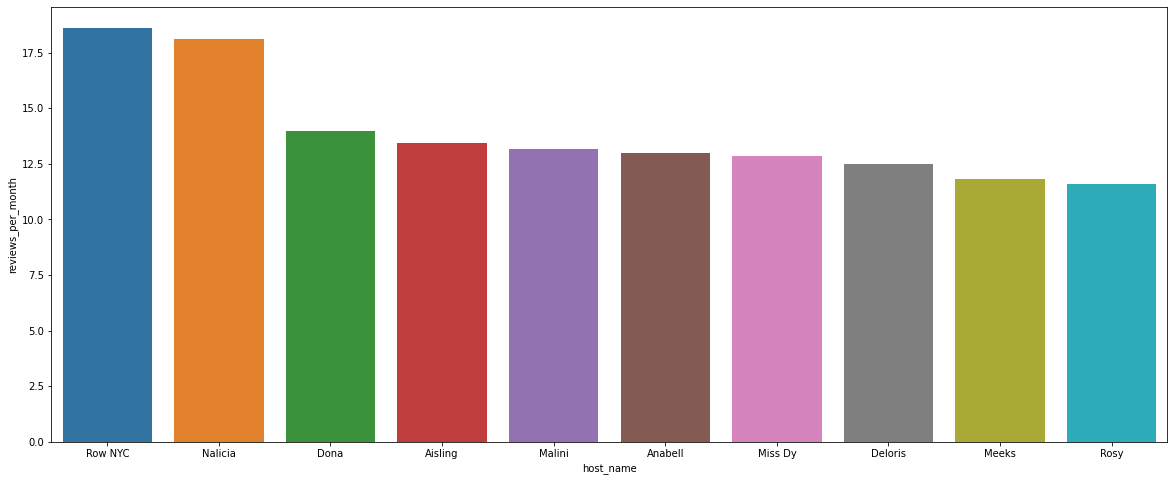

In [ ]:
#7
top_10_hosts = df.groupby(['host_name','neighbourhood_group'])['reviews_per_month'].mean().sort_values(ascending = False).head(10)
top_10_hosts = top_10_hosts.reset_index()
plt.figure(figsize = (20,8))
sns.barplot(x ='host_name',y = 'reviews_per_month', data = top_10_hosts)
plt.show()


In [ ]:
#8
df.groupby(['neighbourhood_group']).agg({'name':'count','reviews_per_month':'mean','price':'mean','minimum_nights':'mean'})

,name,reviews_per_month,price,minimum_nights
neighbourhood_group,,,,
Bronx,1090,1.837831,87.496792,4.560953
Brooklyn,20098,1.283212,124.383207,6.056556
Manhattan,21652,1.272131,196.875814,8.579151
Queens,5666,1.941200,99.517649,5.181433
Staten Island,373,1.872580,114.812332,4.831099
